<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here
import pandas as pd
import spacy
import re
import seaborn as sns
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from spacy.tokenizer import Tokenizer

In [8]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [9]:
print(df.shape)
df.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [10]:
# View Categories.
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [11]:
# Let's select Health & Beauty to look at reviews.
df = df[df['primaryCategories'] == 'Health & Beauty'].copy()
print(df.shape)
df.head()


(12071, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [12]:
# Now let's use Spacy to tokenize.
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [13]:
STOP_WORDS = nlp.Defaults.stop_words.union(["amazon","battery","duracell","batteries.","batteries,","batteries","price."])

In [14]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
            
    tokens.append(doc_tokens)
        
df['tokens'] = tokens

In [15]:
df['tokens'].head()

0    [order, 3, item, bad, quality., miss, backup, ...
1                [bulk, expensive, way, product, like]
2                                      [price, happy.]
3                           [work, brand, well, price]
4                          [long, last, price, great.]
Name: tokens, dtype: object

In [16]:
# Gensim dictionary.
id2word = Dictionary(df['tokens'])
print(len(id2word))

9803


In [17]:
print(id2word[106])
print(id2word[5000])
print(id2word[204])


day
savings!
thanks..


In [18]:
print(len(id2word))


9803


In [19]:
corpus = [id2word.doc2bow(token) for token in df['tokens']]


In [20]:
len(corpus)


12071

In [23]:
len(corpus[0])


11

In [24]:
corpus[0]


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [25]:
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=5, 
    id2word=id2word, 
    workers=4, 
    passes=5)

In [26]:
lda_model.print_topics()


[(0,
  '0.068*"great" + 0.035*"work" + 0.027*"price" + 0.019*"buy" + 0.017*"long" + 0.012*"use" + 0.009*"price!" + 0.009*"product" + 0.008*"purchase" + 0.008*"quality"'),
 (1,
  '0.070*"good" + 0.038*"long" + 0.026*"brand" + 0.020*"price" + 0.017*"great" + 0.015*"work" + 0.012*"well" + 0.011*"buy" + 0.010*"don\'t" + 0.009*"like"'),
 (2,
  '0.025*"buy" + 0.016*"work" + 0.015*"brand" + 0.015*"like" + 0.009*"aa" + 0.009*"long" + 0.009*"don\'t" + 0.008*"package" + 0.007*"get" + 0.007*"aaa"'),
 (3,
  '0.022*"work" + 0.020*"great" + 0.014*"love" + 0.009*"good" + 0.009*"long" + 0.009*"price" + 0.009*"buy" + 0.008*"come" + 0.008*"use" + 0.007*"great!"'),
 (4,
  '0.046*"great" + 0.032*"good" + 0.016*"deal" + 0.015*"price" + 0.012*"far" + 0.012*"long" + 0.011*"buy" + 0.009*"i\'ve" + 0.009*"time" + 0.009*"i\'m"')]

In [27]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
great work price buy long

------ Topic 1 ------
good long brand price great

------ Topic 2 ------
buy work brand like aa

------ Topic 3 ------
work great love good long

------ Topic 4 ------
great good deal price far



In [28]:
# Now let's make the "dope" visualizations.
distro = [lda_model[d] for d in corpus]
num_topics = 4

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]


In [29]:

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.084391  0.047638       1        1  24.736040
2     -0.068446  0.083779       2        1  22.987709
0      0.015089 -0.020854       3        1  22.004368
4      0.052866 -0.052991       4        1  16.463604
3     -0.083900 -0.057572       5        1  13.808283, topic_info=        Term         Freq        Total Category  logprob  loglift
61      good  2556.000000  2556.000000  Default  30.0000  30.0000
70     great  3014.000000  3014.000000  Default  29.0000  29.0000
695     deal   322.000000   322.000000  Default  28.0000  28.0000
17     price  1499.000000  1499.000000  Default  27.0000  27.0000
98      love   497.000000   497.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
14   product    59.682434   490.887482   Topic5  -5.4483  -0.1273
58        aa    57.127136   422.332336   Topic5  -5.4921  -0.0206
18     brand    59.808521  1309.000366   Topic5  -5.4462  -1.1060
6      order    51.270679   358.001862   Topic5  -5.6002   0.0365
157   remote    50.362457   355.364044   Topic5  -5.6181   0.0260

[419 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2954      3  0.785987  (energizers
7178      1  0.825825       (mwh),
231       1  0.071125          1/4
231       2  0.853503          1/4
231       4  0.071125          1/4
...     ...       ...          ...
871       4  0.085338            x
185       1  0.124597         you!
185       3  0.166129         you!
185       5  0.706048         you!
8762      2  0.862134         yup.

[927 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 4])

In [30]:

topics = pd.DataFrame.from_records(new_distro)
topics.head()

,0,1,2,3,4
0,0.017169,0.931314,0.017286,0.017310,0.016920
1,0.034503,0.863496,0.034173,0.033903,0.033925
2,0.068811,0.068405,0.066829,0.067779,0.728176
3,0.041362,0.836826,0.040545,0.040695,0.040572
4,0.837131,0.041356,0.040336,0.040542,0.040635


In [31]:

df['primaryTopic'] = topics.idxmax(axis=1)
df[['primaryTopic', 'reviews.rating']].groupby('primaryTopic').mean()

,reviews.rating
primaryTopic,
0.0,4.552983
1.0,4.538023
2.0,3.977431
3.0,4.453061
4.0,4.527806


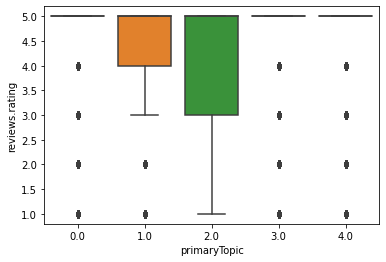

In [32]:
ax = sns.boxplot(x="primaryTopic", y="reviews.rating",
                 data=df)


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling